Project Analysis and Slides are within the Github Repository in a folder named "Documents" 

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from scipy import stats 
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import probplot
from scipy.stats import pearsonr


In [2]:
# Read the CSV file an create a dataframe
df = pd.read_csv('Resources/m160-hw-dataset.csv',encoding = 'utf-8')
df.head()

Loan ID                           Customer ID  \
0  14dd8831-6af5-400b-83ec-68e61888a048  981165ec-3274-42f5-a3b4-d104041a9ca9   
1  4771cc26-131a-45db-b5aa-537ea4ba5342  2de017a3-2e01-49cb-a581-08169e83be29   
2  4eed4e6a-aa2f-4c91-8651-ce984ee8fb26  5efb2b2b-bf11-4dfd-a572-3761a2694725   
3  77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a  e777faab-98ae-45af-9a86-7ce5b33b1011   
4  d4062e70-befa-4995-8643-a0de73938182  81536ad9-5ccf-4eb8-befb-47a4d608658e   

  Loan Status  Current Loan Amount        Term  Credit Score  Annual Income  \
0  Fully Paid             445412.0  Short Term         709.0      1167493.0   
1  Fully Paid             262328.0  Short Term           NaN            NaN   
2  Fully Paid           99999999.0  Short Term         741.0      2231892.0   
3  Fully Paid             347666.0   Long Term         721.0       806949.0   
4  Fully Paid             176220.0  Short Term           NaN            NaN   

  Years in current job Home Ownership             Purpose  Monthly Debt  \
0              8 years  Home Mortgage   Home Improvements       5214.74   
1            10+ years  Home Mortgage  Debt Consolidation      33295.98   
2              8 years       Own Home  Debt Consolidation      29200.53   
3              3 years       Own Home  Debt Consolidation       8741.90   
4              5 years           Rent  Debt Consolidation      20639.70   

   Years of Credit History  Months since last delinquent  \
0                     17.2                           NaN   
1                     21.1                           8.0   
2                     14.9                          29.0   
3                     12.0                           NaN   
4                      6.1                           NaN   

   Number of Open Accounts  Number of Credit Problems  Current Credit Balance  \
0                      6.0                        1.0                228190.0   
1                     35.0                        0.0                229976.0   
2                     18.0                        1.0                297996.0   
3                      9.0                        0.0                256329.0   
4                     15.0                        0.0                253460.0   

   Maximum Open Credit  Bankruptcies  Tax Liens  
0             416746.0           1.0        0.0  
1             850784.0           0.0        0.0  
2             750090.0           0.0        0.0  
3             386958.0           0.0        0.0  
4             427174.0           0.0        0.0

In [3]:
# Max value of Credit Score 
df['Credit Score'].max()

7510.0

In [4]:
# Setting the Credit Score range (350-850)
df = df[(df['Credit Score'] >= 350) & (df['Credit Score'] <= 850)]
print(len(df))

76295


In [5]:
# Define minimum Annual Income value and setting the conditon for the Annual Income
print(df['Annual Income'].min())
df =df[df['Annual Income'] >= 0]
print(len(df))

76627.0
76295


In [6]:
# Calculate the IQR for the 'Annual Income' column
Q1 = df['Annual Income'].quantile(0.25)
Q3 = df['Annual Income'].quantile(0.75)
IQR = Q3 - Q1

print(f"Q1: {Q1}")
print(f"Q3: {Q3}")
print(f"IQR: {IQR}")

Q1: 852577.5
Q3: 1661626.0
IQR: 809048.5


In [7]:
# Define the lower and upper bounds for detecting outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
#print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")

Upper Bound: 2875198.75


In [8]:
# Define the upper bound range for Annual Income
df = df[df['Annual Income']<= upper_bound]
print(len(df))

72775


In [9]:
# Defining new dataframe
df2 = df.copy()

In [10]:
# Checking the null values
null_value_rows = df2[df2.isnull().any(axis = 1)]
print(f'There are total of {len(null_value_rows)} rows with a null value in the dataset')
df2.isnull().sum()

There are total of 40142 rows with a null value in the dataset


Loan ID                             0
Customer ID                         0
Loan Status                         0
Current Loan Amount                 0
Term                                0
Credit Score                        0
Annual Income                       0
Years in current job             3143
Home Ownership                      0
Purpose                             0
Monthly Debt                        0
Years of Credit History             0
Months since last delinquent    38535
Number of Open Accounts             0
Number of Credit Problems           0
Current Credit Balance              0
Maximum Open Credit                 0
Bankruptcies                      143
Tax Liens                           6
dtype: int64

In [11]:
# Dropping the null values
clean_df = df2.dropna()

# Checking the remaining null values
print(clean_df.isnull().sum())
print('\n')

# Checking the size of the data
print(f'This data now contains {clean_df.shape[0]} rows and {clean_df.shape[1]} columns')

Loan ID                         0
Customer ID                     0
Loan Status                     0
Current Loan Amount             0
Term                            0
Credit Score                    0
Annual Income                   0
Years in current job            0
Home Ownership                  0
Purpose                         0
Monthly Debt                    0
Years of Credit History         0
Months since last delinquent    0
Number of Open Accounts         0
Number of Credit Problems       0
Current Credit Balance          0
Maximum Open Credit             0
Bankruptcies                    0
Tax Liens                       0
dtype: int64


This data now contains 32633 rows and 19 columns


In [12]:
# Checking for unique values 
print('Finding unique values in each column')
for i in clean_df.columns[:]:
  print("-"*75)
  print("# of unique values of ",i," column :", clean_df[i].nunique())
  print("unique values:")
  print(clean_df[i].unique())

Finding unique values in each column
---------------------------------------------------------------------------
# of unique values of  Loan ID  column : 26092
unique values:
['4eed4e6a-aa2f-4c91-8651-ce984ee8fb26'
 '273581de-85d8-4332-81a5-19b04ce68666'
 '8af915d9-9e91-44a0-b5a2-564a45c12089' ...
 '8506a4e9-af7d-47d2-a1bf-7ea2c41858f0'
 '06eba04f-58fc-424a-b666-ed72aa008900'
 'e1cb4050-eff5-4bdb-a1b0-aabd3f7eaac7']
---------------------------------------------------------------------------
# of unique values of  Customer ID  column : 26092
unique values:
['5efb2b2b-bf11-4dfd-a572-3761a2694725'
 '90a75dde-34d5-419c-90dc-1e58b04b3e35'
 'af534dea-d27e-4fd6-9de8-efaa52a78ec0' ...
 'be67200e-1ef1-4b63-86a6-2bf27d3c704d'
 '77f2252a-b7d1-4b07-a746-1202a8304290'
 '2ced5f10-bd60-4a11-9134-cadce4e7b0a3']
---------------------------------------------------------------------------
# of unique values of  Loan Status  column : 2
unique values:
['Fully Paid' 'Charged Off']
--------------------------

In [13]:
# Dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 72775 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Loan ID                       72775 non-null  object 
 1   Customer ID                   72775 non-null  object 
 2   Loan Status                   72775 non-null  object 
 3   Current Loan Amount           72775 non-null  float64
 4   Term                          72775 non-null  object 
 5   Credit Score                  72775 non-null  float64
 6   Annual Income                 72775 non-null  float64
 7   Years in current job          69632 non-null  object 
 8   Home Ownership                72775 non-null  object 
 9   Purpose                       72775 non-null  object 
 10  Monthly Debt                  72775 non-null  float64
 11  Years of Credit History       72775 non-null  float64
 12  Months since last delinquent  34240 non-null  float64
 13  Number

In [14]:
# Using .loc to ensure we are modifying the DataFrame correctly
clean_df.loc[:, 'Loan Status'] = clean_df['Loan Status'].str.lower().str.strip().replace({
    'fully paid': 'Fully Paid', 
    'charged off': 'Charged Off'
})


In [15]:
# Renaming Columns
clean_df.loc[:, 'Term'] = clean_df['Term'].str.lower().str.strip().replace({
    'short term': 'Short Term', 
    'long term': 'Long Term'
})

In [16]:
# Check the distribution of 'Loan Status'
loan_status_distribution = clean_df['Loan Status'].value_counts()
print("Loan Status Distribution:\n", loan_status_distribution)

Loan Status Distribution:
 Loan Status
Fully Paid     27353
Charged Off     5280
Name: count, dtype: int64


In [17]:
# Check the distribution of 'Term'
term_distribution = clean_df['Term'].value_counts()
print("Term Distribution:\n", term_distribution)

Term Distribution:
 Term
Short Term    23498
Long Term      9135
Name: count, dtype: int64


In [18]:
# Define mapping for Loan Status
loan_status_map = {'Fully Paid': 1, 'Charged Off': 0}

In [19]:
# Define mapping for Term
term_map = {'Short Term': 1, 'Long Term': 0}

In [20]:
# Apply mapping to create new numerical columns using .loc
clean_df.loc[:, 'Loan Status Numerical'] = clean_df['Loan Status'].map(loan_status_map)
clean_df.loc[:, 'Term Numerical'] = clean_df['Term'].map(term_map)


In [21]:
clean_df.head()

Loan ID  \
2   4eed4e6a-aa2f-4c91-8651-ce984ee8fb26   
6   273581de-85d8-4332-81a5-19b04ce68666   
8   8af915d9-9e91-44a0-b5a2-564a45c12089   
10  32c2e48f-1ba8-45e0-a530-9a6622c18d9c   
12  403d7235-0284-4bb6-919a-09402fecbf7b   

                             Customer ID Loan Status  Current Loan Amount  \
2   5efb2b2b-bf11-4dfd-a572-3761a2694725  Fully Paid           99999999.0   
6   90a75dde-34d5-419c-90dc-1e58b04b3e35  Fully Paid             217646.0   
8   af534dea-d27e-4fd6-9de8-efaa52a78ec0  Fully Paid             548746.0   
10  0de7bcdb-ebf4-4608-ba39-05f083f855b6  Fully Paid           99999999.0   
12  11581f68-de3c-49d8-80d9-22268ebb323b  Fully Paid           99999999.0   

          Term  Credit Score  Annual Income Years in current job  \
2   Short Term         741.0      2231892.0              8 years   
6   Short Term         730.0      1184194.0             < 1 year   
8   Short Term         678.0      2559110.0              2 years   
10  Short Term         728.0       714628.0              3 years   
12  Short Term         740.0       776188.0             < 1 year   

   Home Ownership             Purpose  ...  Years of Credit History  \
2        Own Home  Debt Consolidation  ...                     14.9   
6   Home Mortgage  Debt Consolidation  ...                     19.6   
8            Rent  Debt Consolidation  ...                     22.6   
10           Rent  Debt Consolidation  ...                     16.0   
12       Own Home  Debt Consolidation  ...                      8.5   

    Months since last delinquent  Number of Open Accounts  \
2                           29.0                     18.0   
6                           10.0                     13.0   
8                           33.0                      4.0   
10                          76.0                     16.0   
12                          25.0                      6.0   

    Number of Credit Problems  Current Credit Balance  Maximum Open Credit  \
2                         1.0                297996.0             750090.0   
6                         1.0                122170.0             272052.0   
8                         0.0                437171.0             555038.0   
10                        0.0                203965.0             289784.0   
12                        0.0                134083.0             220220.0   

    Bankruptcies  Tax Liens  Loan Status Numerical  Term Numerical  
2            0.0        0.0                      1               1  
6            1.0        0.0                      1               1  
8            0.0        0.0                      1               1  
10           0.0        0.0                      1               1  
12           0.0        0.0                      1               1  

[5 rows x 21 columns]

In [22]:
# Print the length of clean dataframe 
print(len(clean_df))

32633


In [23]:
# Define new dataframe 
cleaned_data = clean_df.copy()

In [24]:
# Setting the range for Current Loan Amount 
cleaned_data = clean_df[(clean_df['Current Loan Amount'] <= 1000000)]

In [25]:
cleaned_data.head()

Loan ID  \
6   273581de-85d8-4332-81a5-19b04ce68666   
8   8af915d9-9e91-44a0-b5a2-564a45c12089   
14  2e841c8f-3dc1-464d-91c1-3d3d51e64c38   
17  24e8c8bd-d10b-4dac-8b81-1da470ff5ecb   
20  150ebbad-ebed-441e-b70d-2f350ad7dca6   

                             Customer ID  Loan Status  Current Loan Amount  \
6   90a75dde-34d5-419c-90dc-1e58b04b3e35   Fully Paid             217646.0   
8   af534dea-d27e-4fd6-9de8-efaa52a78ec0   Fully Paid             548746.0   
14  2ac05980-7848-4692-89ae-9321afe650f8   Fully Paid             234124.0   
17  967e8733-7189-49b7-a3ab-6a1d0e1abdac   Fully Paid             666204.0   
20  40f729c9-54c7-4768-9fb5-2fa41d074c48  Charged Off             317108.0   

          Term  Credit Score  Annual Income Years in current job  \
6   Short Term         730.0      1184194.0             < 1 year   
8   Short Term         678.0      2559110.0              2 years   
14  Short Term         727.0       693234.0            10+ years   
17   Long Term         723.0      1821967.0            10+ years   
20   Long Term         687.0      1133274.0              8 years   

   Home Ownership             Purpose  ...  Years of Credit History  \
6   Home Mortgage  Debt Consolidation  ...                     19.6   
8            Rent  Debt Consolidation  ...                     22.6   
14           Rent  Debt Consolidation  ...                     24.7   
17  Home Mortgage  Debt Consolidation  ...                     22.0   
20           Rent  Debt Consolidation  ...                     17.4   

    Months since last delinquent  Number of Open Accounts  \
6                           10.0                     13.0   
8                           33.0                      4.0   
14                          46.0                     10.0   
17                          34.0                     15.0   
20                          53.0                      4.0   

    Number of Credit Problems  Current Credit Balance  Maximum Open Credit  \
6                         1.0                122170.0             272052.0   
8                         0.0                437171.0             555038.0   
14                        1.0                 28291.0             107052.0   
17                        0.0                813694.0            2004618.0   
20                        0.0                 60287.0             126940.0   

    Bankruptcies  Tax Liens  Loan Status Numerical  Term Numerical  
6            1.0        0.0                      1               1  
8            0.0        0.0                      1               1  
14           1.0        0.0                      1               1  
17           0.0        0.0                      1               0  
20           0.0        0.0                      0               0  

[5 rows x 21 columns]

In [26]:
# Dataframe statistics
cleaned_data.describe()

Current Loan Amount  Credit Score  Annual Income  Monthly Debt  \
count         27981.000000  27981.000000   2.798100e+04  27981.000000   
mean         304442.308852    712.315035   1.316083e+06  18227.904841   
std          178844.419410     28.090851   5.406290e+05  10337.536105   
min           21450.000000    585.000000   1.112450e+05      0.000000   
25%          171754.000000    699.000000   9.128170e+05  10915.120000   
50%          265782.000000    718.000000   1.228160e+06  16644.950000   
75%          417802.000000    734.000000   1.643975e+06  23797.880000   
max          789096.000000    751.000000   2.875080e+06  79808.170000   

       Years of Credit History  Months since last delinquent  \
count             27981.000000                  27981.000000   
mean                 18.873293                     35.029520   
std                   6.569525                     21.891576   
min                   3.800000                      0.000000   
25%                  14.400000                     16.000000   
50%                  17.600000                     32.000000   
75%                  22.200000                     51.000000   
max                  70.500000                    176.000000   

       Number of Open Accounts  Number of Credit Problems  \
count             27981.000000               27981.000000   
mean                 11.387549                   0.187592   
std                   4.925998                   0.523648   
min                   2.000000                   0.000000   
25%                   8.000000                   0.000000   
50%                  11.000000                   0.000000   
75%                  14.000000                   0.000000   
max                  48.000000                  15.000000   

       Current Credit Balance  Maximum Open Credit  Bankruptcies  \
count            2.798100e+04         2.798100e+04  27981.000000   
mean             2.448251e+05         6.270864e+05      0.119152   
std              2.512091e+05         6.194554e+06      0.365934   
min              0.000000e+00         0.000000e+00      0.000000   
25%              9.834400e+04         2.417140e+05      0.000000   
50%              1.810510e+05         4.074180e+05      0.000000   
75%              3.151340e+05         6.738820e+05      0.000000   
max              6.317956e+06         7.982554e+08      7.000000   

          Tax Liens  Loan Status Numerical  Term Numerical  
count  27981.000000           27981.000000    27981.000000  
mean       0.035238               0.811301        0.706444  
std        0.284157               0.391277        0.455399  
min        0.000000               0.000000        0.000000  
25%        0.000000               1.000000        0.000000  
50%        0.000000               1.000000        1.000000  
75%        0.000000               1.000000        1.000000  
max       15.000000               1.000000        1.000000

In [27]:
# Define maximum value for Credit Score 
cleaned_data['Credit Score'].max()

751.0

QUESTIONS:

Question 1: Is there a significant relationship between annual income and credit score? 

Question 2: What factors influence the likelihood of a loan being charged off or fully paid? 

DATA VISUALIZATION

Introduction: After cleaning the data, we explored various variables in the data frame to understand their distributions and assess the borrowers' financial positions. Our main focus of interest is credit score, annual income, loan status, current loan amount, and monthly debt. 

Our aim to gain a comprehensive understanding of our borrowers' financial profiles led us to create several histograms. These visual representations provided a clear overview of the data, aiding in our analysis. 

First, we visualized the distribution of credit scores to identify the peaks, highlighting common credit score ranges. The second histogram examines annual income distribution to gauge borrower behavior within different income brackets. Lastly, we analyzed the distribution of current loan amounts to understand the loan amounts in different brackets that borrowers still owe. 

All of these visualizations provided a picture for the group to further analyze. The credit score peaks became the foundation for the project. The group decided to explore other variables within a specific credit score range.  

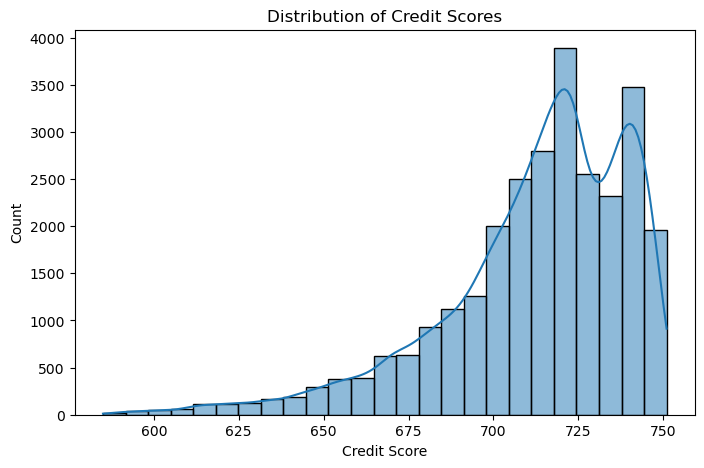

Summary Statistics of Credit Score


count    27981.000000
mean       712.315035
std         28.090851
min        585.000000
25%        699.000000
50%        718.000000
75%        734.000000
max        751.000000
Name: Credit Score, dtype: float64

In [28]:
# Create a histogram for Credit Score Distribution 

plt.figure(figsize=(8, 5))
sns.histplot(cleaned_data ['Credit Score'], bins=25, kde=True)
plt.title('Distribution of Credit Scores')
plt.show()

# Summary Statistics of Credit Score
print("Summary Statistics of Credit Score")
credit_score = cleaned_data['Credit Score'].describe()
credit_score


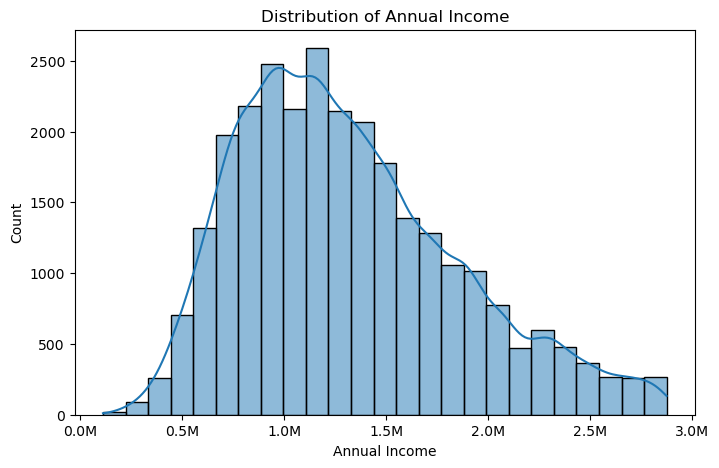

Summary Statistics of Annual Income


count    2.798100e+04
mean     1.316083e+06
std      5.406290e+05
min      1.112450e+05
25%      9.128170e+05
50%      1.228160e+06
75%      1.643975e+06
max      2.875080e+06
Name: Annual Income, dtype: float64

In [29]:
# Create a histogram for Annual Income Distribution 
plt.figure(figsize=(8, 5))
sns.histplot(cleaned_data ['Annual Income'], bins=25, kde=True)
plt.title('Distribution of Annual Income')
xticks = plt.gca().get_xticks()
plt.gca().set_xticklabels(['{:.1f}M'.format(x / 1e6) for x in xticks])
plt.show()

# Summary Statistics of Annual Income
print("Summary Statistics of Annual Income")
annual_income_stat = cleaned_data['Annual Income'].describe()
annual_income_stat

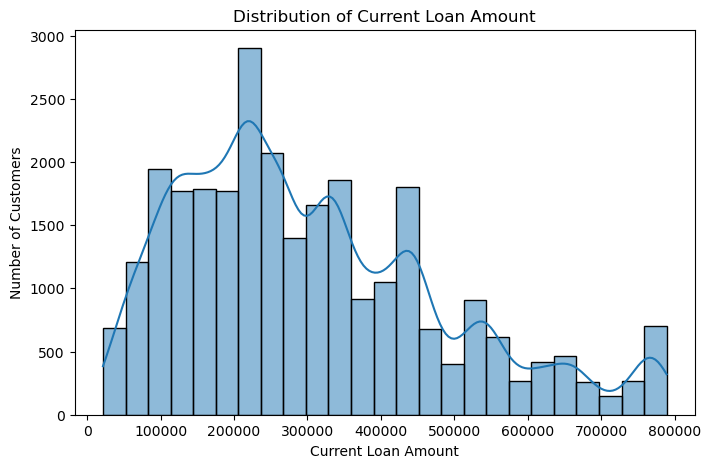

Summary Statistics of Current Loan Amount


count     27981.000000
mean     304442.308852
std      178844.419410
min       21450.000000
25%      171754.000000
50%      265782.000000
75%      417802.000000
max      789096.000000
Name: Current Loan Amount, dtype: float64

In [30]:
# Histogram: Illustrating distribution of Current Loan Amount.
plt.figure(figsize=(8, 5))
sns.histplot(cleaned_data ['Current Loan Amount'], bins=25, kde=True)
plt.title('Distribution of Current Loan Amount')
plt.ylabel('Number of Customers')
plt.show()

# Summary Statistics of Current Loan Amount
print("Summary Statistics of Current Loan Amount")
loan_amount = cleaned_data['Current Loan Amount'].describe()
loan_amount

In [31]:
print(len(cleaned_data))
cleaned_data = cleaned_data[cleaned_data['Credit Score']> 710]
print(len(cleaned_data))

27981
17333


HYPOTHESIS #1:

Null: There is no significant relationship between annual income and credit score. 
    
Alternate: There is a significant relationship between annual income and credit score. 

Our initial assumption was that loan status would show a positive correlation with annual income and credit score.

Initially, the group created several bar charts and scatter plots demonstrating the relationships, but they did not communicate the story we decided to analyze. After consulting with the instructor, we generated four plots comparing annual income to loan status within the credit score range from 710 to 750, where the peaks occurred in the first histogram. 

First, we generated a hexbin plot to visualize the density of annual income and loan status across the cleaned data frame. The plot spotlighted areas with the highest concentration of data points, revealing dense clusters within particular income ranges (shown by the dark blue hues). Then, we created a density plot with the same data points to depict the clustering in the $500k to $1.5m range for annual income. Both visualizations guided us to investigate the high-density clusters and examine the underlying reasons behind them. 

We created a scatter plot to explore the loan status in more detail by randomly selecting 500 borrowers within the cluster range. The scatter plot helped us pinpoint the relationship between credit score and loan status. However, for a clear picture, we then split the scatter plot by loan status, disclosing that borrowers with high credit scores and high annual income tended to have charged-off loan status, contradicting our assumptions. 

This insight challenged our initial assumption that people with high credit scores and incomes would likely pay off their loans.

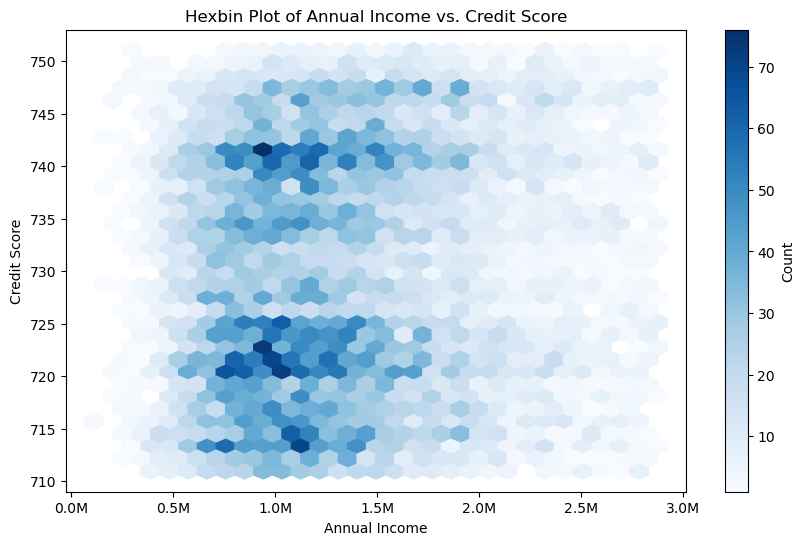

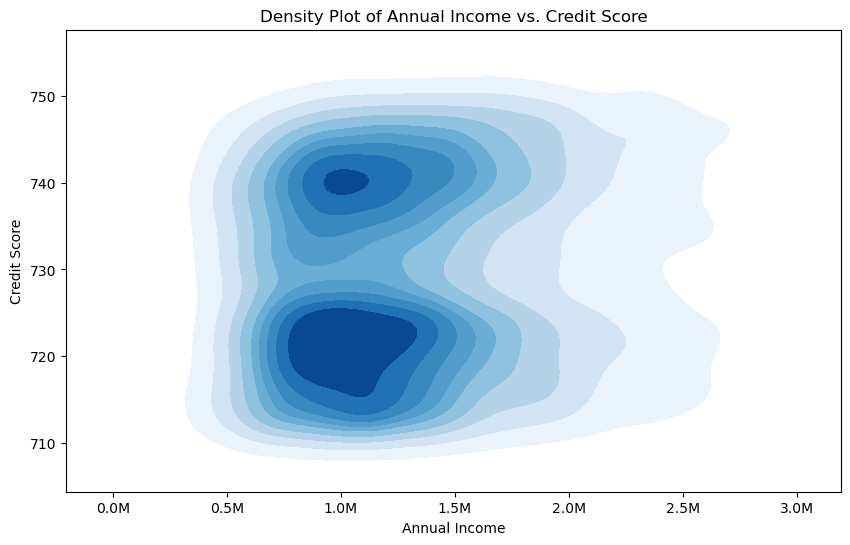

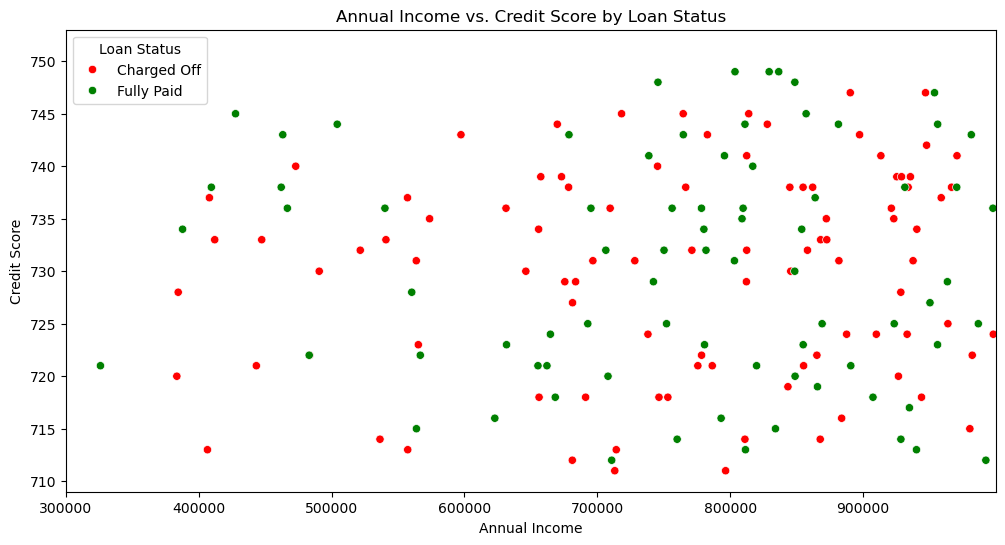

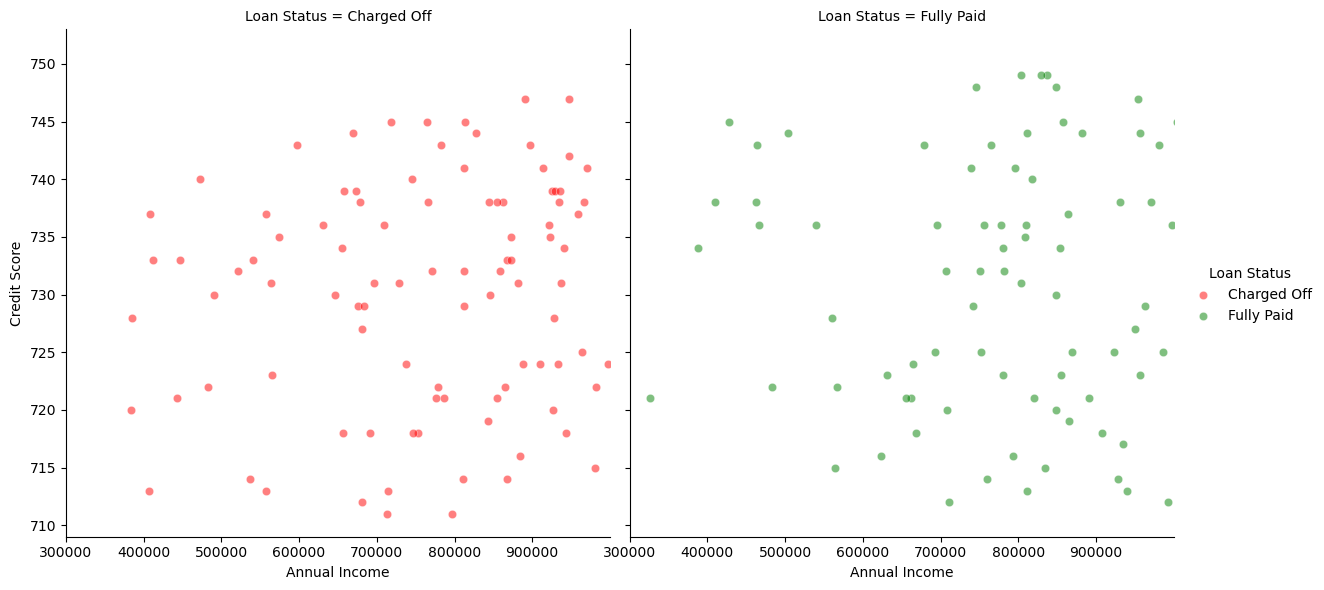

In [32]:
# Hexbin Plot for Annual Income vs Credit Score for all of the Loan Status data
plt.figure(figsize=(10, 6))
plt.hexbin(cleaned_data['Annual Income'], cleaned_data['Credit Score'], gridsize=30, cmap='Blues', mincnt=1)
cb = plt.colorbar(label='Count')
plt.xlabel('Annual Income')
plt.ylabel('Credit Score')
plt.title('Hexbin Plot of Annual Income vs. Credit Score')
xticks = plt.gca().get_xticks()
plt.gca().set_xticklabels(['{:.1f}M'.format(x / 1e6) for x in xticks])
plt.show()

# Color Gradient by Density
plt.figure(figsize=(10, 6))
sns.kdeplot(x=cleaned_data['Annual Income'], y=cleaned_data['Credit Score'], cmap='Blues', shade=True, thresh=0.05)
plt.xlabel('Annual Income') 
plt.ylabel('Credit Score')
plt.title('Density Plot of Annual Income vs. Credit Score')
xticks = plt.gca().get_xticks()
plt.gca().set_xticklabels(['{:.1f}M'.format(x / 1e6) for x in xticks])
plt.show()

# Scatter plot with different colors for Loan Status
charged_off_data = cleaned_data[cleaned_data['Loan Status'] == 'Charged Off'].sample(n=250, random_state=1)
fully_paid_data = cleaned_data[cleaned_data['Loan Status'] == 'Fully Paid'].sample(n=250, random_state=1)
random_data = pd.concat([charged_off_data, fully_paid_data])

plt.figure(figsize=(12, 6))
sns.scatterplot(x='Annual Income', y='Credit Score', hue='Loan Status', data=random_data, palette={'Fully Paid': 'green', 'Charged Off': 'red'})
plt.xlabel('Annual Income')
plt.ylabel('Credit Score')
plt.title('Annual Income vs. Credit Score by Loan Status')
plt.legend(title='Loan Status')
plt.xlim([300000, 1000000])  # Assuming annual income ranges from 100,000 to 1,000,000
plt.xticks(range(300000, 1000000, 100000)) 
plt.show()

# Facet Grid with different colors for Fully Paid vs Charged Off Loan Status
g = sns.FacetGrid(random_data, col="Loan Status", hue="Loan Status", height=6, aspect=1, palette={'Fully Paid': 'green', 'Charged Off': 'red'})
g.map_dataframe(sns.scatterplot, x="Annual Income", y="Credit Score", alpha=0.5)
plt.xlim([300000, 1000000])  # Assuming annual income ranges from 100,000 to 1,000,000
plt.xticks(range(300000, 1000000, 100000)) 
g.add_legend()
plt.show()

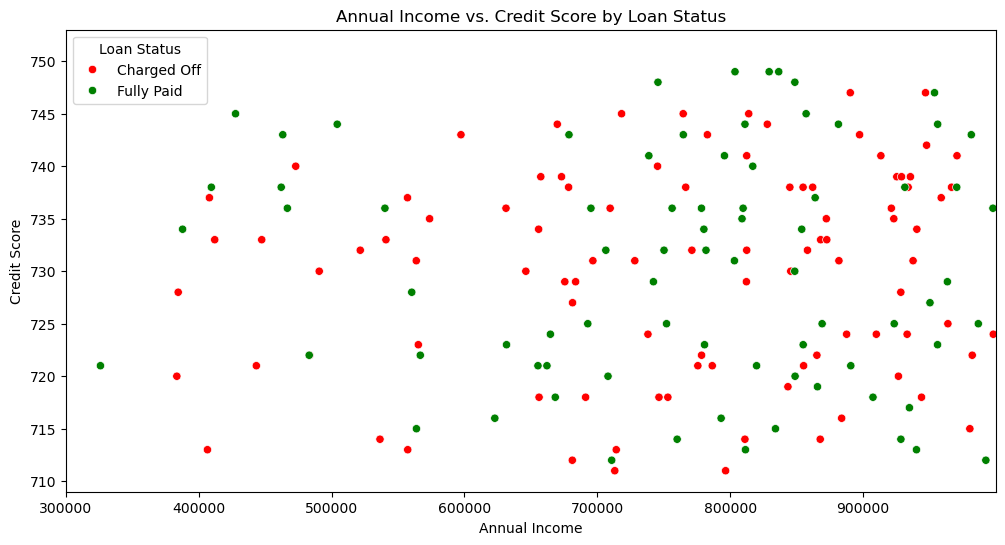

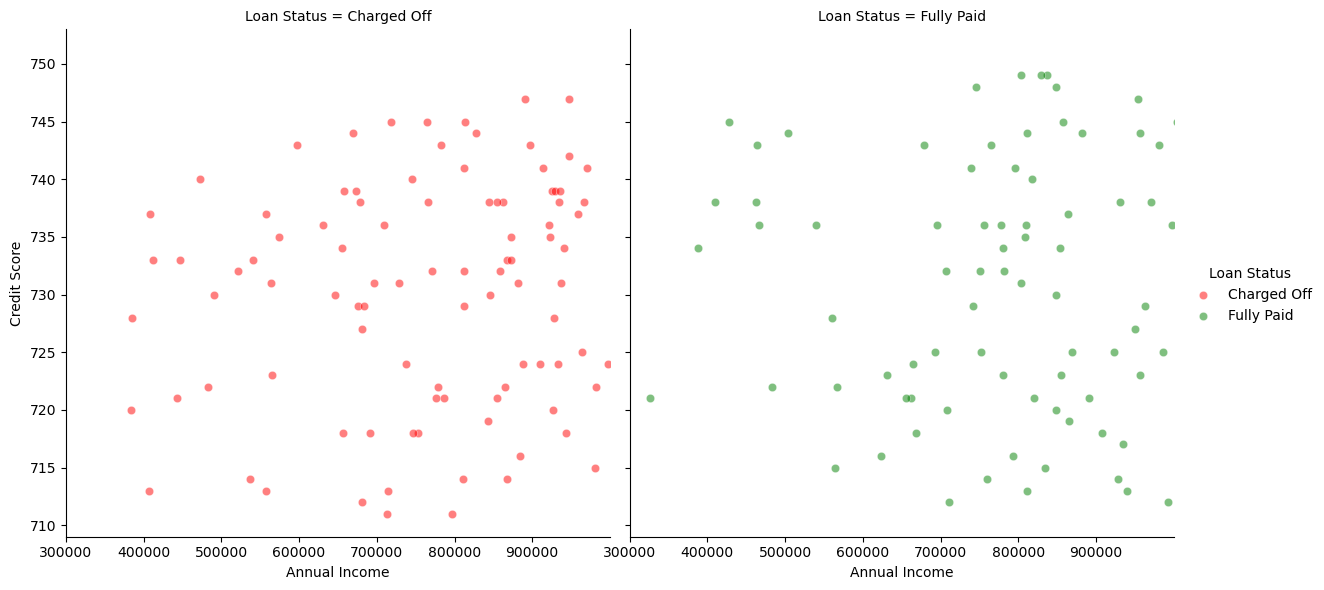

In [33]:
# Scatter plot with different colors for Loan Status
charged_off_data = cleaned_data[cleaned_data['Loan Status'] == 'Charged Off'].sample(n=250, random_state=1)
fully_paid_data = cleaned_data[cleaned_data['Loan Status'] == 'Fully Paid'].sample(n=250, random_state=1)
random_data = pd.concat([charged_off_data, fully_paid_data])

plt.figure(figsize=(12, 6))
sns.scatterplot(x='Annual Income', y='Credit Score', hue='Loan Status', data=random_data, palette={'Fully Paid': 'green', 'Charged Off': 'red'})
plt.xlabel('Annual Income')
plt.ylabel('Credit Score')
plt.title('Annual Income vs. Credit Score by Loan Status')
plt.legend(title='Loan Status')
plt.xlim([300000, 1000000])  # Assuming annual income ranges from 100,000 to 1,000,000
plt.xticks(range(300000, 1000000, 100000)) 
plt.show()

# Facet Grid with different colors for Fully Paid vs Charged Off Loan Status
g = sns.FacetGrid(random_data, col="Loan Status", hue="Loan Status", height=6, aspect=1, palette={'Fully Paid': 'green', 'Charged Off': 'red'})
g.map_dataframe(sns.scatterplot, x="Annual Income", y="Credit Score", alpha=0.5)
plt.xlim([300000, 1000000])  # Assuming annual income ranges from 100,000 to 1,000,000
plt.xticks(range(300000, 1000000, 100000)) 
g.add_legend()
plt.show()

In [34]:
# Correlation analysis between Annual Income vs Credit Score for Charged Off vs Fully Paid Loan Status

# Calculate the Pearson correlation coefficient and p-value for 'Charged Off'
corr_coef_charged_off, p_value_charged_off = pearsonr(charged_off_data['Annual Income'], charged_off_data['Credit Score'])
print(f"Charged Off - Pearson correlation coefficient: {corr_coef_charged_off}")
print(f"Charged Off - P-value: {p_value_charged_off}")

# Calculate the Pearson correlation coefficient and p-value for 'Fully Paid'
corr_coef_fully_paid, p_value_fully_paid = pearsonr(fully_paid_data['Annual Income'], fully_paid_data['Credit Score'])
print(f"Fully Paid - Pearson correlation coefficient: {corr_coef_fully_paid}")
print(f"Fully Paid - P-value: {p_value_fully_paid}")


Charged Off - Pearson correlation coefficient: 0.08378435072441298
Charged Off - P-value: 0.1866912558834643
Fully Paid - Pearson correlation coefficient: 0.060551227688365516
Fully Paid - P-value: 0.3403488889013202


In [35]:
# T-test for Annual Income vs Loan Status (Fully Paid & Charged Off) 
t_statistic, p_value = ttest_ind(charged_off_data['Annual Income'], fully_paid_data['Annual Income'])
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")


T-statistic: -0.9290053177648983
P-value: 0.35333639791891513


To test our first hypothesis, we were intrigued by the findings in the scatter plots and decided to focus our analysis on the 'Charged Off' loan status. 

The scatter plot defines a cluster of data points representing borrowers with annual incomes ranging from $700,000 to $1,000,000 and credit scores between 710 and 750. 
We included the current loan amount, represented by the size of the red markers, to see how it influences other variables. It is interesting to see that most loans have amounts lower than $45,000 despite the borrowers' high-income levels. Theoretically, high-income borrowers should be able to pay off their loans, but not in this case.

We were unsure which statistical tests could best explain our findings, but ChatGPT suggested performing cluster and correlation analysis along with an ANOVA and t-test.

We conducted a correlation and t-test analysis to examine and support our hypothesis and findings. Our goal was to determine if there was a significant relationship between the variables, but the results indicated that there was no significant correlation. The current loan amount does not influence borrowers' behavior and financial position because most amounts are relatively low. It can be concluded that other factors, aside from income level and credit score, negatively affect the borrower's financial situation, causing them to charge off their loans when they can pay them off.

Our findings and statistical analysis support the null hypothesis and we decided to analyze other correlations.  

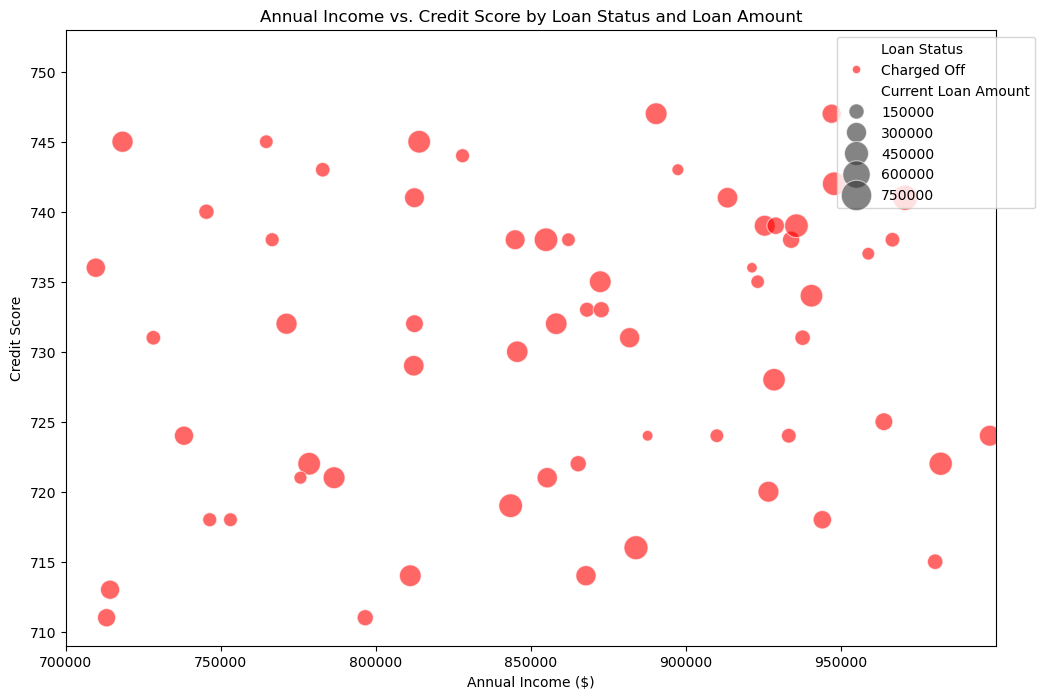

In [36]:
# Create dataframe for Annual Income and Credit Score
charged_off_data = cleaned_data[cleaned_data['Loan Status'] == 'Charged Off'].sample(n=250, random_state=1)
charged_palette=['red']

# Plotting Scatter Plot
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Annual Income', y='Credit Score', hue='Loan Status', size='Current Loan Amount',
                sizes=(50, 500), alpha=0.6, data=charged_off_data, palette=charged_palette)
plt.xlabel('Annual Income ($)')
plt.ylabel('Credit Score')
plt.title('Annual Income vs. Credit Score by Loan Status and Loan Amount')

# Specific Annual Income ranges from 100,000 to 1,000,000
plt.xlim([700000, 1000000])  
plt.xticks(range(700000, 1000000, 50000)) 
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper right')
plt.show()

In [37]:
# Descriptive Statistic Analysis for Annual Income and Credit Score 

descriptive_stats = charged_off_data[['Annual Income', 'Credit Score', 'Current Loan Amount']].describe()
descriptive_stats

Annual Income  Credit Score  Current Loan Amount
count   2.500000e+02    250.000000           250.000000
mean    1.249899e+06    729.908000        269741.296000
std     5.360663e+05     10.108822        142704.813311
min     3.834960e+05    711.000000         32582.000000
25%     8.628945e+05    721.000000        157641.000000
50%     1.166828e+06    731.000000        230252.000000
75%     1.492816e+06    738.000000        352495.000000
max     2.840310e+06    751.000000        785796.000000

In [38]:
# Correlation Analysis for the scatter plot above. 
charged_off_data = cleaned_data[(cleaned_data['Loan Status'] == 'Charged Off') &
                                (cleaned_data['Annual Income'] >= 700000) &
                                (cleaned_data['Annual Income'] <= 1000000)].sample(n=250, random_state=1)

annual_income = charged_off_data['Annual Income']
credit_score = charged_off_data['Credit Score']
current_loan_amount = charged_off_data['Current Loan Amount']

# Correlation between Annual Income and Credit Score
corr_income_credit, p_value_income_credit = pearsonr(annual_income, credit_score)

# Correlation between Annual Income and Current Loan Amount
corr_income_loan, p_value_income_loan = pearsonr(annual_income, current_loan_amount)

# Correlation between Credit Score and Current Loan Amount
corr_credit_loan, p_value_credit_loan = pearsonr(credit_score, current_loan_amount)

# Print the results
print(f"Correlation between Annual Income and Credit Score: {corr_income_credit}, P-value: {p_value_income_credit}")
print(f"Correlation between Annual Income and Current Loan Amount: {corr_income_loan}, P-value: {p_value_income_loan}")
print(f"Correlation between Credit Score and Current Loan Amount: {corr_credit_loan}, P-value: {p_value_credit_loan}")



Correlation between Annual Income and Credit Score: 0.07011932379906405, P-value: 0.26938165459893093
Correlation between Annual Income and Current Loan Amount: 0.09317539142827225, P-value: 0.14182011053674354
Correlation between Credit Score and Current Loan Amount: -0.00217606099262016, P-value: 0.9726904300917865


In [39]:
# Two sample t-test for the scatter plot above. 
charged_off_data = cleaned_data[cleaned_data['Loan Status'] == 'Charged Off'].sample(n=250, random_state=1)

charged_off_data = charged_off_data[(charged_off_data['Annual Income'] >= 700000) & (charged_off_data['Annual Income'] <= 1000000)]

# Split the Annual Income into two categories: below median and above median within the specified range
median_income = charged_off_data['Annual Income'].median()
low_income_scores = charged_off_data[charged_off_data['Annual Income'] <= median_income]['Credit Score']
high_income_scores = charged_off_data[charged_off_data['Annual Income'] > median_income]['Credit Score']

# T-test
t_stat, p_value = ttest_ind(low_income_scores, high_income_scores)

# Print the results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")


T-statistic: -1.2846468038278762
P-value: 0.20377283821799316


HYPOTHESIS #2: 

Null: There is no relationship between annual income and monthly debt. 

Alternate: There is a realtionship between annual income and montly debt. 

In the early stages of our project, one of the members proposed creating a correlation matrix heatmap to visualize the relationships between all the given variables. 

The heatmap visually expressed all possible correlations portrayed by a spectrum of colors, with deep red squares emphasizing strong positive correlations. Our attention was drawn to two specific areas of the heatmap: the high concentration of squares in the top left corner and the low concentration in the bottom left corner. We realized that while most correlations are weak or negative, there are two areas that contain intriguing values, that we would explore. Although we could not explore every square, we decided to analyze a positive and a negative correlation within those areas. 


We used the heatmap findings to develop our second hypothesis, exploring the connection between annual income and monthly debt. The heatmap demonstrated a correlation value of 0.53, indicated by a medium red tone, implying a moderate positive correlation. To visualize this connection, we created a simple scatter plot with blue markers representing the interaction between the variables. However, to better understand the clustering, we took a random sample of 500 data points and created a second scatter plot to underline the noticeable pattern. As income increased, debt increased among borrowers, although after the $2 million mark, the markers became more scattered, suggesting high variation among the data points. To further emphasize the trend, we created a regression line to see how close the data points are to the line visually and their predictability for future trends. Despite the positive relationship, we observed that some borrowers have high incomes with low debt, which might influence the trend line in the future. 

To support the hypothesis, we conducted a correlation test and a t-test, which rejected the null hypothesis. 

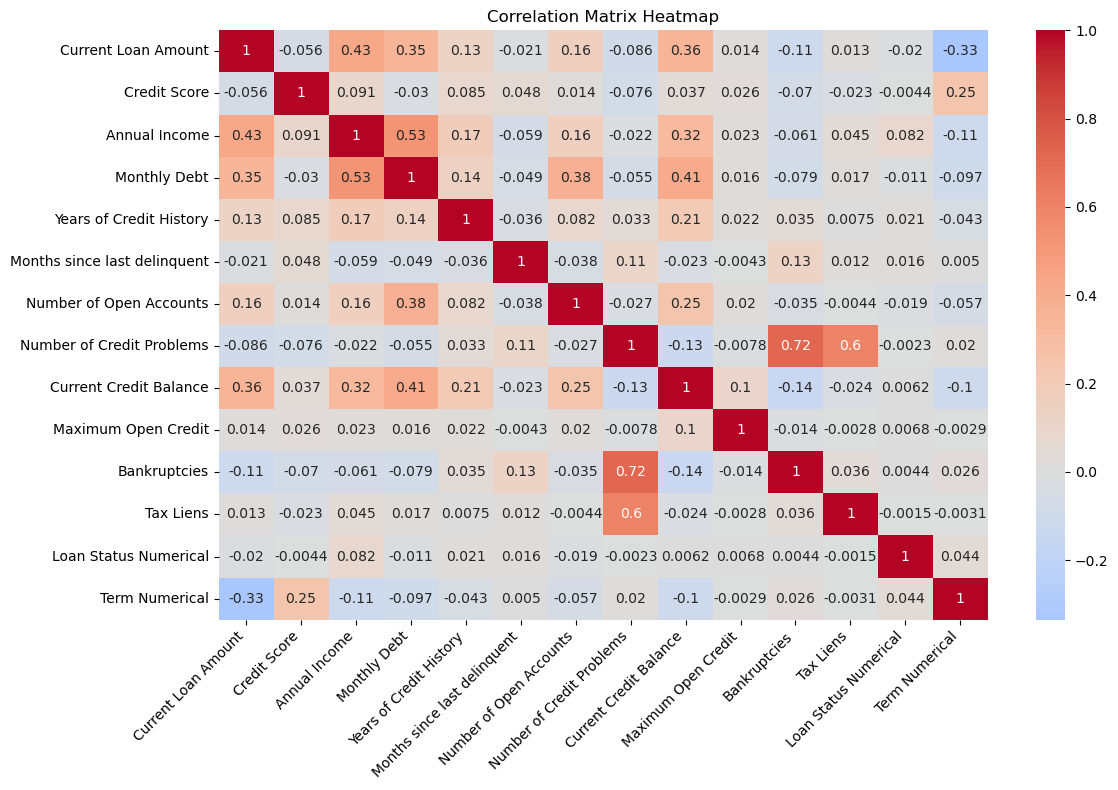

In [40]:
# Heatmap of the entire dataframe
heat_df = cleaned_data[['Current Loan Amount', 'Credit Score', 'Annual Income', 'Monthly Debt',	'Years of Credit History',	'Months since last delinquent',	'Number of Open Accounts',	'Number of Credit Problems', 'Current Credit Balance',	'Maximum Open Credit',	'Bankruptcies',	'Tax Liens', 'Loan Status Numerical', 'Term Numerical']]
my_df = heat_df.corr(method='pearson')

# Plot the chart
plt.figure(figsize=(12,8), dpi=100)
sns.heatmap(my_df, annot=True, cmap='coolwarm', center=0, annot_kws={"size":10} ) 
plt.xticks(rotation=45, ha='right')
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()


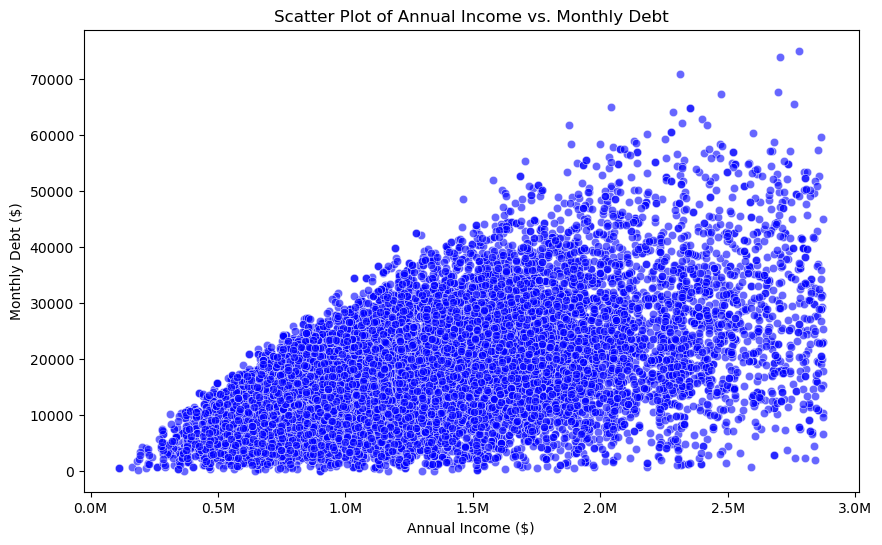

Pearson correlation coefficient: 0.5293630896450264
P-value: 0.0


In [41]:
# Create a scatter plot of Annual Income vs Monthly Debt for the entire dataframe
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income', y='Monthly Debt', data=cleaned_data, alpha=0.6, color='blue')
plt.title('Scatter Plot of Annual Income vs. Monthly Debt')
plt.xlabel('Annual Income ($)')
plt.ylabel('Monthly Debt ($)')
xticks = plt.gca().get_xticks()
plt.gca().set_xticklabels(['{:.1f}M'.format(x / 1e6) for x in xticks])
plt.show()

# Calculate the Correlation Coefficient
correlation, p_value = pearsonr(cleaned_data['Annual Income'], cleaned_data['Monthly Debt'])
print(f"Pearson correlation coefficient: {correlation}")
print(f"P-value: {p_value}")


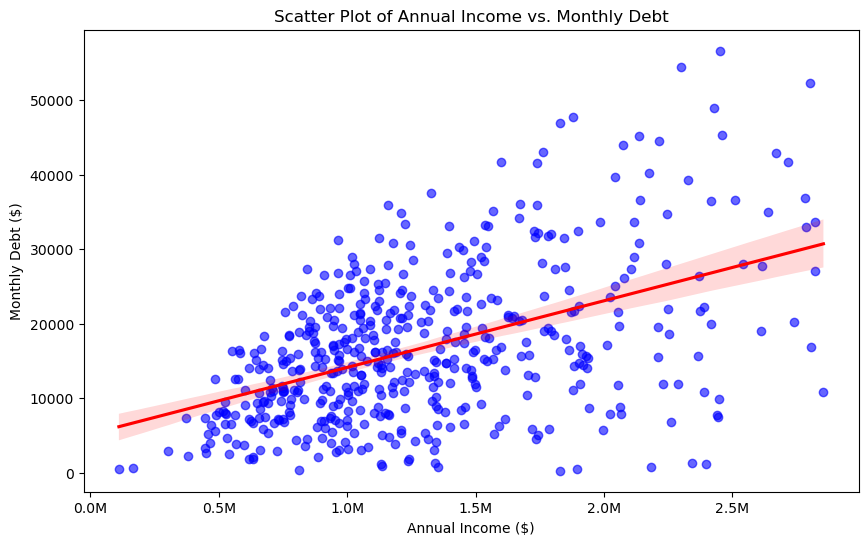

Pearson correlation coefficient: 0.48257244880769135
P-value: 1.578455341682846e-30
T-statistic: -8.47788438113654
P-value: 2.6179478496380187e-16


In [42]:
# Create a scatter plot for Annual Income vs Montly Debt for the random sample of 500
debt_df = cleaned_data.sample(n=500, random_state=1)

plt.figure(figsize=(10, 6))
sns.regplot(x='Annual Income', y='Monthly Debt', data=debt_df, scatter_kws={'alpha':0.6, 'color':'blue'}, line_kws={'color':'red'})
plt.title('Scatter Plot of Annual Income vs. Monthly Debt')
plt.xlabel('Annual Income ($)')
plt.ylabel('Monthly Debt ($)')
xticks = plt.gca().get_xticks()
plt.gca().set_xticklabels(['{:.1f}M'.format(x / 1e6) for x in xticks])
plt.show()

# Calculate the correlation coefficient
correlation, p_value = pearsonr(debt_df['Annual Income'], debt_df['Monthly Debt'])
print(f"Pearson correlation coefficient: {correlation}")
print(f"P-value: {p_value}")

# Split the Annual Income into two categories: below median and above median within the specified range
debt_income = debt_df['Annual Income'].median()
low_income_group = debt_df[debt_df['Annual Income'] <= debt_income]['Monthly Debt']
high_income_group = debt_df[debt_df['Annual Income'] > debt_income]['Monthly Debt']

# T-test 
t_stat, p_value = ttest_ind(low_income_group, high_income_group)

# Print the results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

HYPOTHESIS #3

Null: There is no correlation in the average number of bankruptcies and monthly income across different average annual income ranges. 

Alternate: There is a correlation in the average number of bankruptcies and monthly income across different average annual income ranges. 

Lastly, the line charts look into the light blue square valued at -0.079 in the bottom left corner of the heat map. We continued using monthly debt and annual income as our variables. However, we included bankruptcies to see if high monthly debt and low annual income resulted in borrowers filing for bankruptcy and vice versa. 

We had initially randomly selected the 500 data points and plotted the chart, but visually, it was messy, and the monthly debt labels were compacted and clouded. So, we created bins for the monthly debt column and calculated the average for monthly debt and bankruptcies before plotting. Providing an efficient visual representation of relationship between monthly debt and bankruptcies. 

The first line chart illustrates the trend of average bankruptcies across the monthly debt bins, revealing a significant downward trend. This suggests that borrowers with monthly debt lower than $5000 will likely face bankruptcy. The average number of bankruptcies steadily declines until the monthly debt reaches the $20k-$30k bin, with an average number of bankruptcies around 0.05. There is a slight increase in bankruptcies between $30k and $50k, and it drops to 0 by $60k. Notably, borrowers with high monthly debt are less likely to file for bankruptcy, especially since most individuals also 'charge off' their loan statuses from previous visualizations.  

To further investigate this relationship, we created a multiline chart to see if annual income influences the interaction between the number of bankruptcies and monthly debt. The lines indicate that borrowers in the low to moderate-income ranges had a higher debt correlating with fewer bankruptcies. However, for those in the high-income levels, the interaction is the opposite; as the monthly debt decreases slightly, but the probability of individuals filing for bankruptcy increases. The relationship was unclear to us; we are unsure why individuals who make over $900k have high debt levels and bankruptcy risk. It would be interesting to look at the pattern for those making above $1 million because we cannot predict the pattern by looking at the charts below. Overall, the ANOVA test failed to reject our null hypothesis. We need to explore this correlation with a larger sample size to conclude if there is a statistical significance between all of the variables or consider other variables such as number of credit card problems. 

In [43]:
cleaned_data['Monthly Debt'].max()

75023.4

In [44]:
cleaned_data['Monthly Debt'].min()

0.0

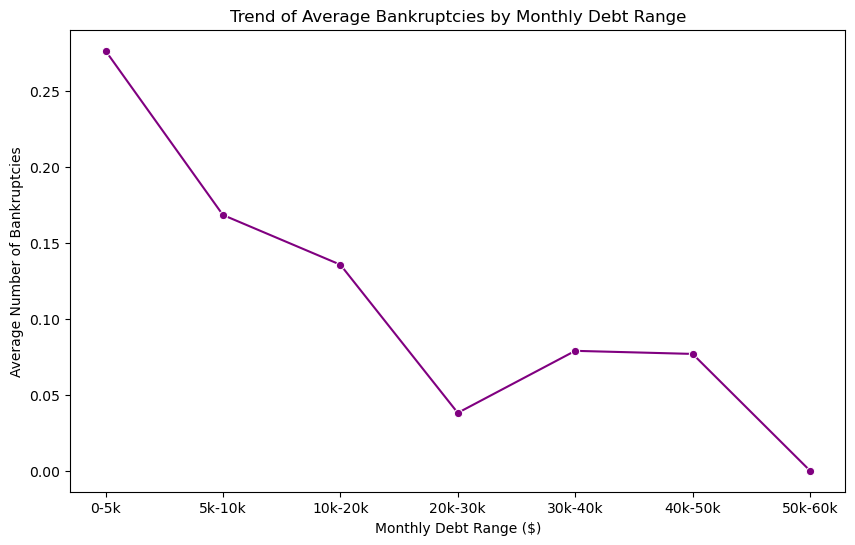

In [45]:
# Create a line chart for average Bankruptcies vs Montly Debt for the random sample of 500
debt_df = cleaned_data.sample(n=500, random_state=1)

debt_df['Monthly Debt Range'] = pd.cut(debt_df['Monthly Debt'], 
                                       bins=[0, 5000, 10000, 20000, 30000, 40000, 50000, 60000, 70000],
                                       labels=['0-5k', '5k-10k', '10k-20k', '20k-30k', '30k-40k', '40k-50k', '50k-60k', '60k-70k'])

# Calculate the mean number of Bankruptcies for Monthly Debt range
debt_range_means = debt_df.groupby('Monthly Debt Range')['Bankruptcies'].mean().reset_index()

# Create a line chart
plt.figure(figsize=(10, 6))
sns.lineplot(x='Monthly Debt Range', y='Bankruptcies', data=debt_range_means, marker='o', color='purple')
plt.title('Trend of Average Bankruptcies by Monthly Debt Range')
plt.xlabel('Monthly Debt Range ($)')
plt.ylabel('Average Number of Bankruptcies')
plt.show()


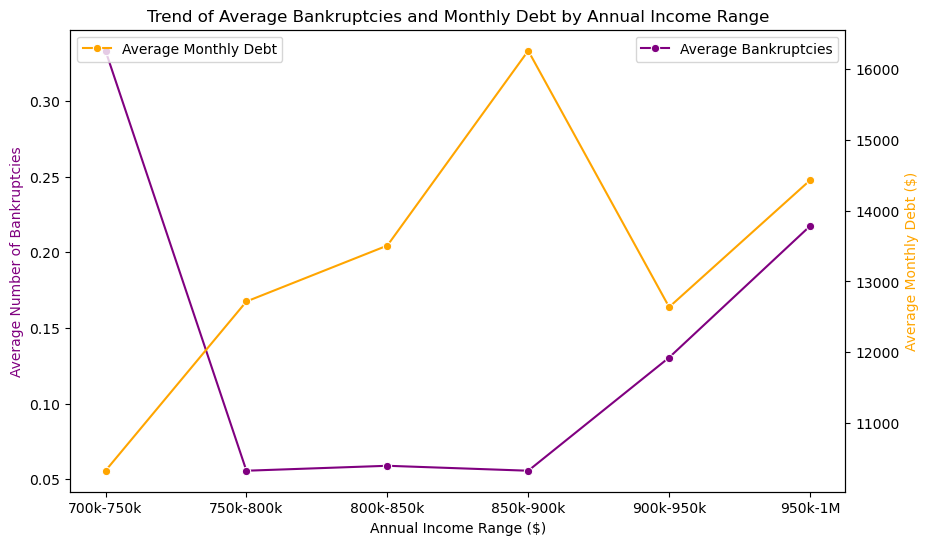

In [46]:
# Create a multiple line chart for average number of Bankruptcies and Monthly Debt by Annual Income 
debt_df['Annual Income Range'] = pd.cut(debt_df['Annual Income'], 
                                       bins=[700000,750000, 800000, 850000, 900000, 950000, 1000000],
                                       labels=['700k-750k', '750k-800k', '800k-850k', '850k-900k', '900k-950k', '950k-1M'])

# Calculate the mean number of Bankruptcies and Monthly Debt for each Annual Income range
income_range_means = debt_df.groupby('Annual Income Range').agg({'Bankruptcies': 'mean', 'Monthly Debt': 'mean'}).reset_index()


# Plot Average Bankruptcies
plt.subplots(figsize=(10, 6))
sns.lineplot(x='Annual Income Range', y='Bankruptcies', data=income_range_means, marker='o', color='purple', label='Average Bankruptcies')
plt.title('Trend of Average Bankruptcies and Monthly Debt by Annual Income Range')
plt.xlabel('Annual Income Range ($)')
plt.ylabel('Average Number of Bankruptcies', color='purple')

# # Create a secondary y-axis for Monthly Debt
ax2 = plt.gca().twinx()
sns.lineplot(x='Annual Income Range', y='Monthly Debt', data=income_range_means, marker='o', color='orange', ax=ax2, label='Average Monthly Debt')
ax2.set_ylabel('Average Monthly Debt ($)', color='orange')

plt.legend(loc='upper left')
plt.show()

In [47]:
# ANOVA for Annual Income vs Bankruptcies 
f_stat_b, p_value_b = stats.f_oneway(
    debt_df[debt_df['Annual Income Range'] == '700k-750k']['Bankruptcies'],
    debt_df[debt_df['Annual Income Range'] == '750k-800k']['Bankruptcies'],
    debt_df[debt_df['Annual Income Range'] == '800k-850k']['Bankruptcies'],
    debt_df[debt_df['Annual Income Range'] == '850k-900k']['Bankruptcies'],
    debt_df[debt_df['Annual Income Range'] == '900k-950k']['Bankruptcies'],
    debt_df[debt_df['Annual Income Range'] == '950k-1M']['Bankruptcies']
)

# ANOVA fo rAnnual Income vs Monthly Debt
f_stat_d, p_value_d = stats.f_oneway(
    debt_df[debt_df['Annual Income Range'] == '700k-750k']['Monthly Debt'],
    debt_df[debt_df['Annual Income Range'] == '750k-800k']['Monthly Debt'],
    debt_df[debt_df['Annual Income Range'] == '800k-850k']['Monthly Debt'],
    debt_df[debt_df['Annual Income Range'] == '850k-900k']['Monthly Debt'],
    debt_df[debt_df['Annual Income Range'] == '900k-950k']['Monthly Debt'],
    debt_df[debt_df['Annual Income Range'] == '950k-1M']['Monthly Debt']
)

print(f'ANOVA for Bankruptcies: F-statistic = {f_stat_b}, P-value = {p_value_b}')
print(f'ANOVA for Monthly Debt: F-statistic = {f_stat_d}, P-value = {p_value_d}')


ANOVA for Bankruptcies: F-statistic = 1.6678109788790043, P-value = 0.14880606102897884
ANOVA for Monthly Debt: F-statistic = 1.5036083272136924, P-value = 0.19496902072674618


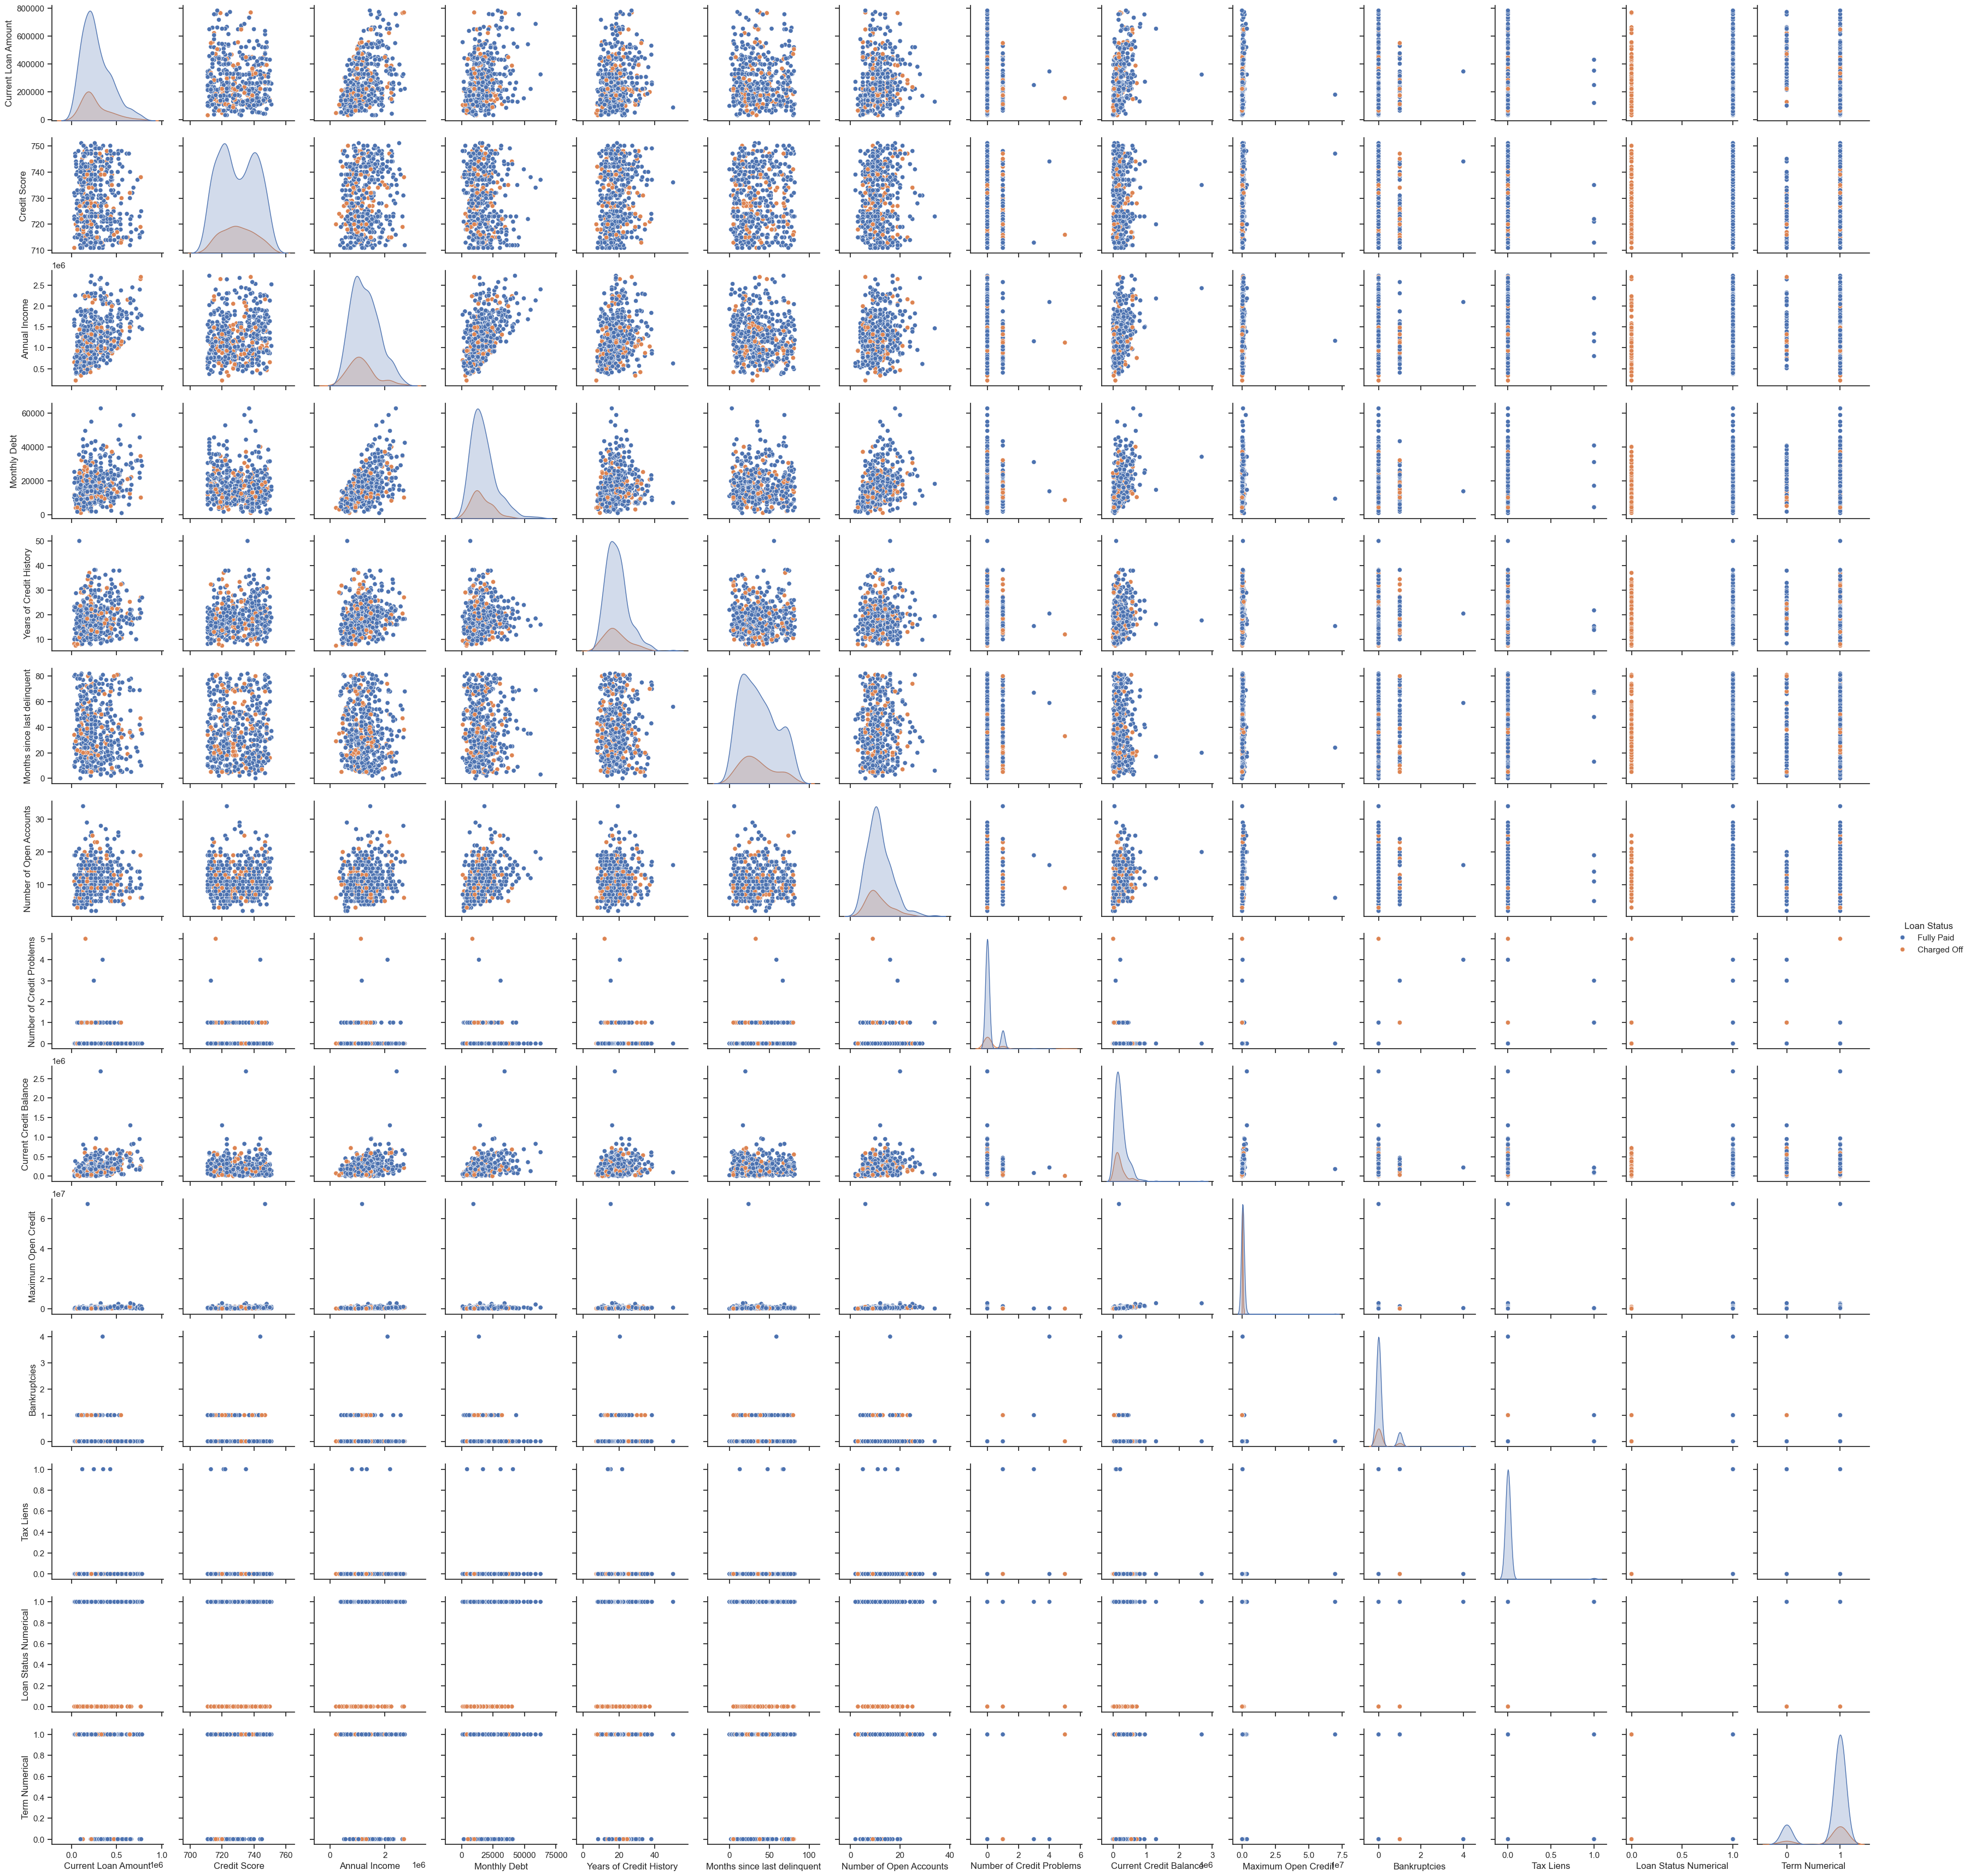

In [48]:
sns.set_theme(style="ticks")

sns.pairplot(cleaned_data[:500], hue="Loan Status")

In [49]:
cleaned_data.to_csv("Resources/cleaned_m160.csv", encoding='utf-8')
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17333 entries, 6 to 99997
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Loan ID                       17333 non-null  object 
 1   Customer ID                   17333 non-null  object 
 2   Loan Status                   17333 non-null  object 
 3   Current Loan Amount           17333 non-null  float64
 4   Term                          17333 non-null  object 
 5   Credit Score                  17333 non-null  float64
 6   Annual Income                 17333 non-null  float64
 7   Years in current job          17333 non-null  object 
 8   Home Ownership                17333 non-null  object 
 9   Purpose                       17333 non-null  object 
 10  Monthly Debt                  17333 non-null  float64
 11  Years of Credit History       17333 non-null  float64
 12  Months since last delinquent  17333 non-null  float64
 13  Number

 REFLECTION:
 Initial Methodology: 
 Initially, our group performed an exploratory data analysis (EDA) to understand the dataset and brainstorm potential questions and hypotheses to explore. We started by comparing significant columns using basic bar charts and scatter plots with statistical analysis. Following this, we focused on analyzing specific loan status categories within a certain credit score range to analyze the relationship further. However, Brian and Elias's feedback provided insights into our data and possible connections, guiding our analysis to target interesting findings through visualizations and statistics. 
 
    
 Bias/Assumptions: 
 At the start, we assumed that credit score significantly influences annual income, current loan amount, and the number of credit problems. We hypothesized that individuals with higher credit scores are more likely to make timely payments compared to those with low credit scores. This pivotal assumption shaped our analysis and visualizations. However, our direction could have been more organized due to the presence of outliers and irrelevant values that distorted our findings.

 Group Challenges:
 Our group encountered several challenges throughout this project. Initially, we struggled to find a dataset with sufficient data for visualizations and statistical tests. We acquired a suitable dataset with Elias's assistance and began the data-cleaning process. Additionally, we needed help understanding the project requirements due to the vague directions provided. This ambiguity caused us to restart the project multiple times. We are grateful to Elias, who took time after class to guide us in the right direction and provided helpful feedback and resources. To prepare for this project, we conducted additional research to write code that produced clear visualizations that effectively delivered our findings and other interesting factors. 
